In [1]:
import panel as pn

In [2]:
import panel as pn

pn.extension('')
pn.panel('Hello').servable()

Markdown(str)

In [3]:
pn.panel("Hello again").servable()

Markdown(str)

In [7]:
# import panel as pn
# import numpy as np
# import matplotlib.pyplot as plt

# from matplotlib.figure import Figure

# pn.extension(sizing_mode="stretch_width")
# def plot_sldbin(x,data,bins):
#     fig, ax = plt.subplots(figsize=(8, 4))
#     ax.bar(x,data,bins=bins)
#     return fig

# data=np.random.normal(1,1,size=100)
# X=np.linspace(-3,3,100)
# bins_input=pn.widgets.IntSlider(value=20,start=10,end=30,step=1,name="Bins")
# Bplot=pn.bind(plot_sldbin,X,data,bins_input)

# pn.Column(bins_input,Bplot).servable()

Column(sizing_mode='stretch_width')
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] IntSlider(end=200, name='Número de Bins', sizing_mode='stretch_width', start=5, step=5, value=20)
    [2] Matplotlib(Figure, sizing_mode='stretch_width')
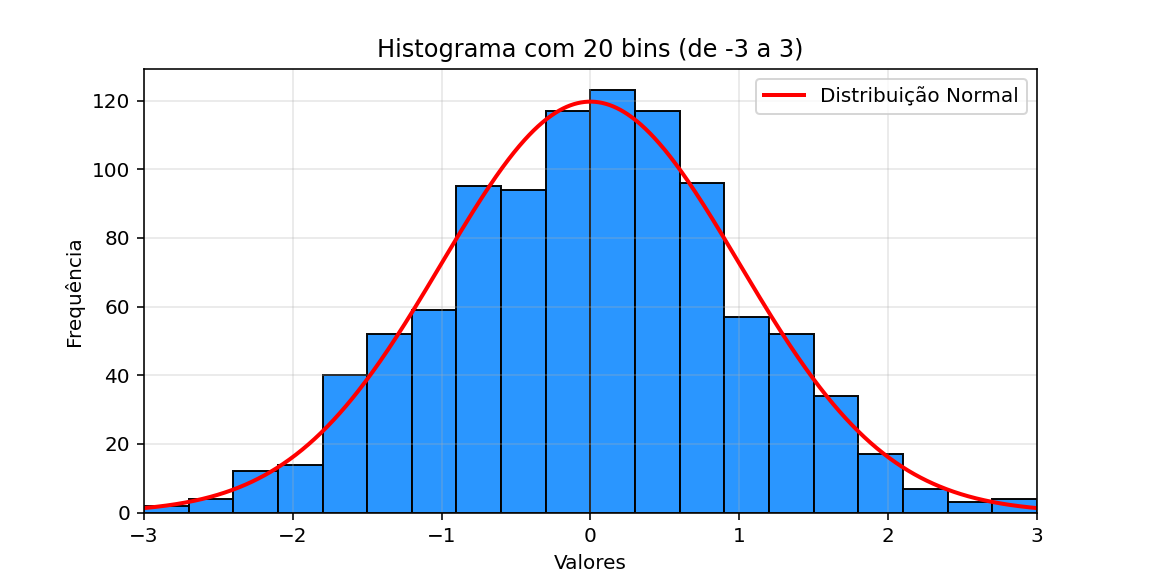

In [8]:
import panel as pn
import numpy as np
import matplotlib.pyplot as plt

pn.extension(sizing_mode="stretch_width")

def plot_sldbin(data, bins,mu,sigma):
    # Criar figura
    fig = plt.Figure(figsize=(8, 4))
    ax = fig.add_subplot(111)

    #plotar os dados
    # Criar histograma com range especificado
    hist_data, bin_edges, _ = ax.hist(
        data, 
        bins=bins, 
        range=(-3, 3), 
        edgecolor='black', 
        alpha=0.95, 
        color='dodgerblue',
        density=False  # Frequência, não densidade
    )
    
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')
    ax.set_title(f'Histograma com {bins} bins (de -3 a 3)')

    #calcular a normal 
    # Calcular centro dos bins para a curva
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    # Gerar pontos para a curva normal
    x_curve = np.linspace(-3, 3, 1000)
    #mu, sigma = 0, 1 
    
    # Calcular curva normal (em frequência, não densidade)
    # Primeiro calcular densidade
    normal_density = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_curve - mu)/sigma)**2)
    # Converter para frequência: densidade * total de dados * largura do bin
    bin_width = 6 / bins  # 6 = 3 - (-3)
    normal_frequency = normal_density * len(data) * bin_width
    
    # Plotar curva normal
    ax.plot(x_curve, normal_frequency, linewidth=2, color='red', label='Distribuição Normal')
    
    ax.set_xlim(-3, 3)
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    return fig

# Gerar dados
mu, sigma = 0, 1
data = np.random.normal(mu, sigma, 1000)

# Widget para controlar o número de bins
bins_input = pn.widgets.IntSlider(
    value=20, 
    start=5, 
    end=200, 
    step=5, 
    name="Número de Bins"
)

# Vincular a função ao widget
Bplot = pn.bind(plot_sldbin, data=data, bins=bins_input,mu=mu,sigma=sigma)

# Criar layout e servir
pn.Column(
    pn.pane.Markdown("## Histograma de -3 a 3"),
    bins_input,
    pn.pane.Matplotlib(Bplot, dpi=144)
).servable(title="Histograma Interativo")